## CLASSIFICATION Evaluation Metrics

* True positive (TP): Given an image, if your model predicts the image has disease, and the actual target for that image has disease, it is considered a true positive.

* True negative (TN): Given an image, if your model predicts that the image does not have disease and the actual target says that it is a non-disease image, it is considered a true negative.

* False positive (FP): Given an image,if your model predicts disease and the actual target for that is non-disease, its a false positive

* False negative (FN): Given an image, if your model predicts non-disease and the actual target for that image is disease , it is a false negative.


* yTrue is list of true values
* yPred is list of predicted values
* yProba is list of probabilities for 1 

In [12]:
a=[0,1,1,1,1,0,0,1,1,0,1,1,0,1]
b=[0,1,0,1,0,1,0,0,1,1,0,0,1,1]

from sklearn import metrics

In [13]:
def true_positive(yTrue,yPred):
    TP=0
    
    for yt,yp in zip(yTrue,yPred):
        if yt == 1 and yp== 1:
            TP+=1
    
    return TP   

In [14]:
def true_negative(yTrue,yPred):
    TN=0
    
    for yt,yp in zip(yTrue,yPred):
        if yt == 0 and yp == 0:
            TN+=1
            
    return TN

In [15]:
def false_positive(yTrue,yPred):
    FP=0
    
    for yt,yp in zip(yTrue,yPred):
        if yt == 0 and yp ==1:
            FP+=1
            
    return FP

In [16]:
def false_negative(yTrue,yPred):
    FN=0
    
    for yt,yp in zip(yTrue,yPred):
        if yt == 1 and yp ==0:
            FN+=1
            
    return FN

* ACCURACY SCORE = It defines how accurate our model is. for example if 80 out of 100 items are classified correctly its accuracy is 80%

* ACCURACY SCORE = (TP+TN)/(TP+TN+FP+FN)

In [17]:
def accuracy(yTrue,yPred):
    
    TP=true_positive(yTrue,yPred)
    TN=true_negative(yTrue,yPred)
    FP=false_positive(yTrue,yPred)
    FN=false_negative(yTrue,yPred)
    
    ACCURACY= (TP+TN)/(TP+TN+FP+FN)
    
    return ACCURACY

* PRECISION : Precision quantifies the number of positive class predictions that actually belong to the positive class.

* (P) PRECISION = (TP)/(TP+FP)

In [18]:
def precision(yTrue,yPred):
    
    TP=true_positive(yTrue,yPred)
    FP=false_positive(yTrue,yPred)
    
    PRECISION= TP/(TP+FP)
    
    return PRECISION
    

* RECALL : Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

* (R) RECALL or Sensitivity = (TP)/(TP+FN) 

In [19]:
def recall(yTrue,yPred):
    
    TP=true_positive(yTrue,yPred)
    FN=false_negative(yTrue,yPred)
    
    RECALL= (TP)/(TP+FN)
    
    return RECALL
    

* F-Measure provides a single score that balances both the concerns of precision and recall in one number.
* F1 SCORE = (2*P*R)/(P+R)

In [20]:
def f1_score(yTrue,yPred):
    
    P=precision(yTrue,yPred)
    R=recall(yTrue,yPred)
    
    F1=(2*P*R)/(P+R)
    
    return F1

In [21]:
print("SKLEARN ACCURACY: ", metrics.accuracy_score(a,b))
print("OUR ACCURACY: ",accuracy(a,b))

SKLEARN ACCURACY:  0.42857142857142855
OUR ACCURACY:  0.42857142857142855


In [22]:
print("SKLEARN PRECISION: ", metrics.precision_score(a,b))
print("OUR PRECISION: ",precision(a,b))

SKLEARN PRECISION:  0.5714285714285714
OUR PRECISION:  0.5714285714285714


In [23]:
print("SKLEARN RECALL: ", metrics.recall_score(a,b))
print("OUR RECALL: ",recall(a,b))

SKLEARN RECALL:  0.4444444444444444
OUR RECALL:  0.4444444444444444


In [24]:
print("SKLEARN F1 SCORE: ", metrics.f1_score(a,b))
print("OUR F1 Score: ",f1_score(a,b))

SKLEARN F1 SCORE:  0.5
OUR F1 Score:  0.5




* TruePositiveRate(TPR) or RECALL = (TP)/(TP+FN) 
* FalsePostiveRate(FPR) = (FP)/(TN+FP) 



* AREA BETWEEN TPR & FPR is Receiver Operating Characteristic (ROC)


In [25]:
def TPR(yTrue,yPred):
    
    return recall(yTrue,yPred)

def FPR(yTrue,yPred):
    
    FP=false_positive(yTrue,yPred)
    TN=true_negative(yTrue,yPred)
    
    FPR= (FP)/(TN+FP)
    
    return FPR

Most of the classification models predict a probability,
the value of precision and recall changes significantly based on the thresholld value(usually 0.5)

In [26]:
yTrue=[0,0,1,0,1,
      0,0,1,0,1,0,0,1]

#probabiltiy of the values being 1 
yPred=[0.1,0.6,0.8,
      0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]
         
            
threshold=[0,0.3,0.4,
           0.5,0.6,0.7,0.8,0.88,0.9,0.95,1.0]
      

In [27]:
tpr_list=[]
fpr_list=[]

for t in threshold:
    predictions=[1 if x>=t else 0 for x in yPred]
    tpr_pred=TPR(yTrue,predictions)
    fpr_pred=FPR(yTrue,predictions)
    
    tpr_list.append(tpr_pred)
    fpr_list.append(fpr_pred)

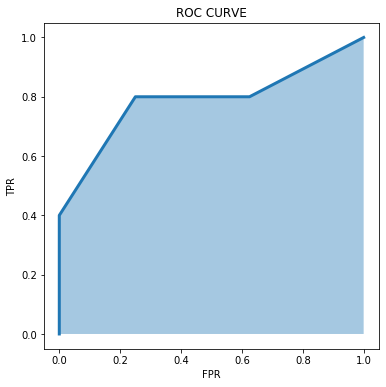

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.fill_between(fpr_list,tpr_list,alpha=0.4)
plt.plot(fpr_list,tpr_list,lw=3)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

* For Binary clasification:
* Logloss: measures the performance of a classification model where the prediction input is a probability value between 0 and 1. 
* logloss= - 1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction))
* take the mean of the individual losses for overall logloss
* lower the logloss better is the model




In [46]:
yTrue= [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]


yProba=[0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]



In [33]:
import numpy as np
def logloss(yTrue,yProba):
    ep=1e-15
    loss_list=[]
    
    for yt,yp in zip(yTrue,yProba):
        yp=np.clip(yp,ep,1-ep)  
        t_loss = - 1.0 * ( yt * np.log(yp) + (1 - yt) * np.log(1 - yp) )
        loss_list.append(t_loss)
        loss=np.mean(loss_list)
                             
        
    return loss
    

In [37]:
print("SKLEARN LOG-LOSS",metrics.log_loss(yTrue,yProba))
print("OUR LOG-LOSS",logloss(yTrue,yProba))

SKLEARN LOG-LOSS 0.49882711861432294
OUR LOG-LOSS 0.49882711861432294


## REGRESSION Evaluation Metrics

* Error is the difference between true value and predicted value
* ERROR = True Value - Predicted Value


* Mean Absolute Error (MAE) : Its the mean of all errors

In [49]:
yTrue=[1,2,3,1,2,3,1,2,3]
yPred=[2,1,3,1,2,3,3,1,2]

In [50]:
def MeanAbsoluteError(yTrue,yPred):
    error=0
    for yt,yp in zip(yTrue,yPred):
        error+=np.abs(yt-yp)
    error=error/len(yTrue)
    
    return error

In [51]:
print("SKLEARN MAE: ",metrics.mean_absolute_error(yTrue,yPred))
print("Our MAE: ",MeanAbsoluteError(yTrue,yPred))

SKLEARN MAE:  0.6666666666666666
Our MAE:  0.6666666666666666


* Mean Squared Error (MSE) : Mean of the squares of all the errors
* MSE= mean of (TrueValue-PredictedValue)^2

In [39]:
def MeanSquaredError(yTrue,yPred):
    error=0
    for yt,yp in zip(yTrue,yPred):
        error+= (yt-yp)**2
    error=error/len(yTrue)
    
    return error

In [54]:
print("SKLEARN MSE: ",metrics.mean_squared_error(yTrue,yPred))
print("Our MSE: ",MeanSquaredError(yTrue,yPred))

SKLEARN MSE:  0.8888888888888888
Our MSE:  0.8888888888888888


* Squared Log Error :
* it is the mean of square of logloss

In [56]:
def SquaredLogError(yTrue,yPred):
    error=0
    for yt,yp in zip(yTrue,yPred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
        
    error=error/len(yTrue)
    
    return error

In [57]:
print("SKLEARN SLE: ",metrics.mean_squared_log_error(yTrue,yPred))
print("Our SLE: ",SquaredLogError(yTrue,yPred))

SKLEARN SLE:  0.11737998337864991
Our SLE:  0.11737998337864997


* R squared Error:


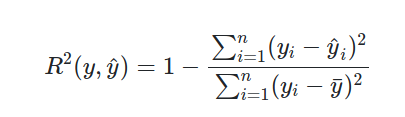

In [59]:
def r2(yTrue,yPred):
    
    meanTrue=np.mean(yTrue)
    Nr=0
    Dr=0
    
    for yt,yp in zip(yTrue,yPred):
        Nr+=(yt-yp)**2
        Dr+=(yt-meanTrue)**2
    x=Nr/Dr
    y=1-x
        
    return y
    

In [60]:
print("SKLEARN R2 score: ",metrics.r2_score(yTrue,yPred))
print("Our R2 score: ",r2(yTrue,yPred))

SKLEARN R2 score:  -0.33333333333333326
Our R2 score:  -0.33333333333333326
